In [16]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
from mtcnn.mtcnn import MTCNN

In [17]:
image = cv2.imread('images/mrbean.jpg')
image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

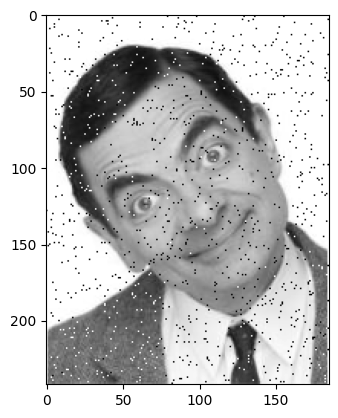

In [18]:
#part_1 : add noise
rows , cols = image.shape

def add_noise(image):
    for i in range(1000):
        x = random.randint(0,rows-1)
        y = random.randint(0,cols-1)
        if image[x,y] <= 125:
            image[x,y] = 255
        else:
            image[x,y] = 0     
    return image

img = add_noise(image)
cv2.imwrite('output_img/result.jpg', img)
plt.imshow(img, cmap="gray")

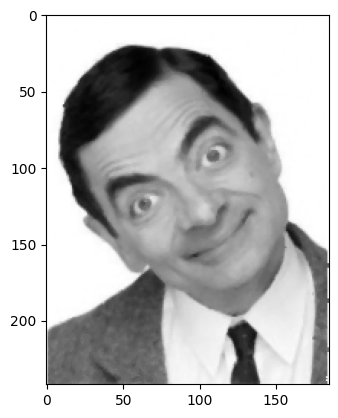

In [19]:
#part_2 : Remove noise
image = cv2.imread('output_img/result.jpg',0)
result_2 = cv2.medianBlur(image, 3)
cv2.imwrite('output_img/result_2.jpg', result_2)
plt.imshow(result_2 , cmap = 'gray')

In [20]:
#part_3 : rotate image
image = plt.imread("images/mrbean.jpg")

In [21]:
face_detector = MTCNN()

In [22]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    plt.show()

In [23]:
results = face_detector.detect_faces(image)

1/1 [==============================] - 0s 70ms/step


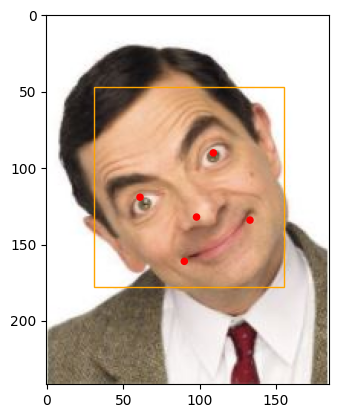

In [24]:
draw_facebox_and_keypoints('images/mrbean.jpg' , results)

In [25]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

def alignment_procedure(img, left_eye, right_eye):

    #this function aligns given face in img based on left and right eye coordinates
    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    #-----------------------
    #find rotation direction

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock
    
    #find length of triangle edges
    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    #-----------------------

    #apply cosine rule

    if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        #-----------------------
        #rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    #-----------------------

    return img #return img anyway

In [26]:
detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(image, left_eye, right_eye)

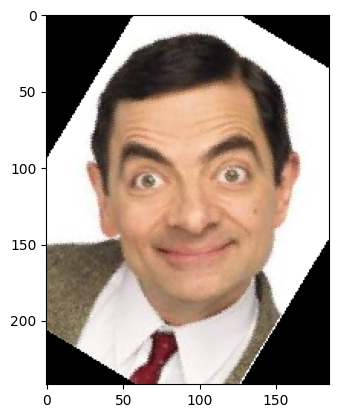

In [27]:
plt.imshow(img)

In [29]:
cv2.imwrite('output_img/rotated_result.jpg' , img)

True